# MACHINE LEARNING WITH SCIKIT-LEARN

# Partie IV : analyse exploratoire et mise en forme des descripteurs

Dans cet exercice nous allons (re)voir quelques outils classiques d'**analyse exploratoire** disponibles dans le  package *Pandas*, que l'on met en général en oeuvre pour avoir une meilleure connaissance du jeu de données à étudier avant de passer à l'étape de modélisation à proprement parler.

Nous apprendrons également à manipuler certains outils de **pré-traitement des données** disponibles dans le [module PreProcessing](http://scikit-learn.org/stable/modules/preprocessing.html) de scikit-learn, permettant d'appliquer diverses transformations aux descripteurs : standardisation, imputation de données manquantes, ... 

Cet exercice est tiré du livre [hands on machine learning with scikit-learn and tensorflow](http://shop.oreilly.com/product/0636920052289.do). 
Nous travaillerons à partir du jeu de données **California Housing**, et plus précisemment d'une [version sensiblement modifiée](https://github.com/ageron/handson-ml/tree/master/datasets/housing), préparée par l'auteur du livre. 

### Question 1 : charger le jeu de données *housing.csv* en utilisant la fonction *read_csv* du package *pandas*

In [2]:
# standard imports
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# load dataset
housing  = pd.read_csv("housing.csv")


### Question 2 : analyser les propriétés générales du jeu de données via les méthodes *info* et *describe* de la classe DataFrame. De combien d'instances et de descripteurs se constitue le jeu de données ? De quelle nature sont-ils ? Quelle(s) autre(s) observations(s) peut-on faire ? Quelle fonction de Pandas permet d'avoir un aperçu des premières  lignes du tableau ?

In [3]:
# show general properties
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# show feature summary
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# show first lines
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Question 3 : représenter les distributions des descripteurs quantitatifs en utilisant la méthode *hist* de la classe  DataFrame. Qu'observez-vous ? Comment contrôle le nombre de cases à considérer dans l'histogramme ?
* NB : il n'est pas nécessaire de sélectionner au préalable les descripteurs quantitatifs, la fonction **hist** les sélectionne automatiquement.

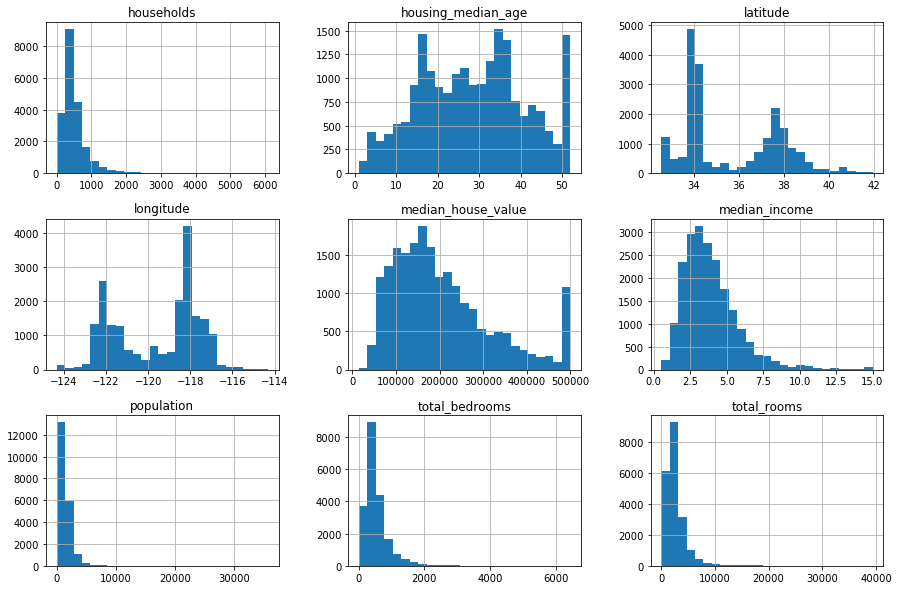

In [6]:
housing.hist(bins = 25, figsize=(15,10))
plt.show()

### Question 4 : représenter les corrélations entre les descripteurs *median_house_value*, *median_income* et *total_rooms* via la fonction *scatter_matrix* (à importer du module *pandas.plotting*). Quelle(s) observation(s) peut-on faire ? Comment faire pour afficher les densités (plutôt que les histogrammnes)  sur la diagonale de la figure ?

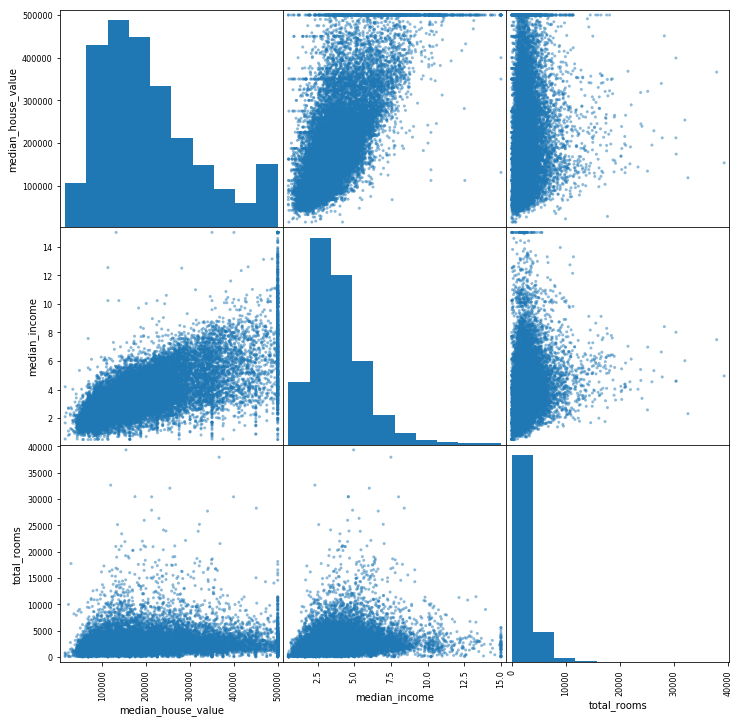

In [7]:
from pandas.plotting import scatter_matrix

vars_plot = ['median_house_value','median_income','total_rooms']

scatter_matrix(housing[vars_plot], figsize = (12,12))
plt.show(scatter_matrix)

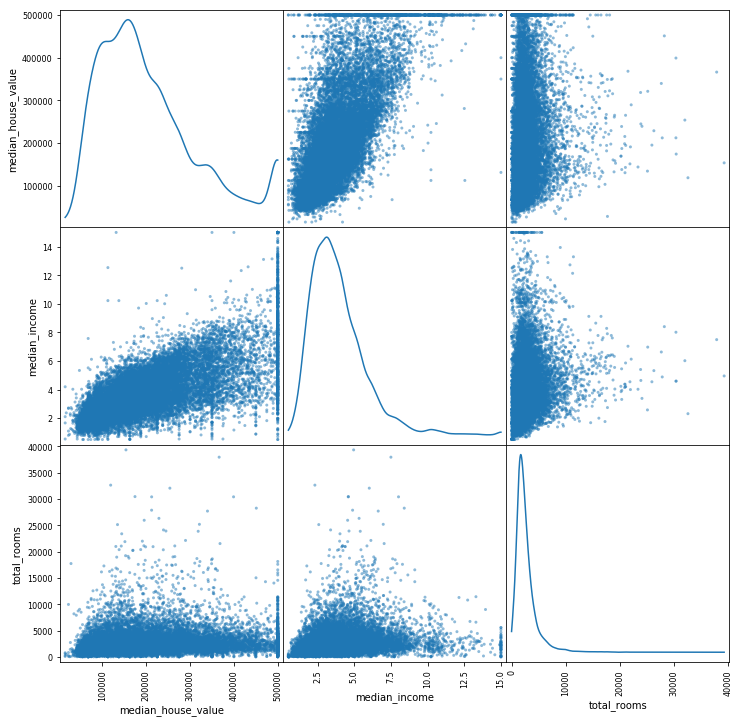

In [8]:
scatter_matrix(housing[vars_plot], figsize = (12,12), diagonal = 'kde')
plt.show(scatter_matrix)

### Question 5 : nous allons à présent mettre en forme le jeu de données : 
#### 1) la variable d'intérêt (à prédire) est la variable *median_house_value* : séparer le jeu de données en variables explicatives (features) et variable à expliquer (réponse).
* on pourra notamment utiliser la méthode **drop** des DataFrames de Pandas

In [9]:
outcome = housing['median_house_value']
features = housing.drop('median_house_value', axis = 1)

#### 2) Mettre en forme les descripteurs quantitatifs grace au code ci-dessous, qui va les extraire, imputer les données manquantes par la méthode de la médiane et les standardiser. Vérifier ensuite que les valeurs stockées dans le champ *statistics_* de l'objet *Imputer* correspondent bien aux valeurs médianes des descripteurs. Comment accéde t'on aux valeurs des moyennes et variances utilisées par la standardisation ? 

In [10]:
# discard qualitative features : median-based imputation only valid for quantitative variables
features_num = features.drop("ocean_proximity", axis = 1)

# import Imputer class and instantiate
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
# fit imputer
imputer.fit(features_num)
# apply imputer
X_input = imputer.transform(features_num)

# apply standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit scaler
scaler.fit(X_input)
# apply scaler
X_std = scaler.transform(X_input) 

In [11]:
features_num.median()

longitude             -118.4900
latitude                34.2600
housing_median_age      29.0000
total_rooms           2127.0000
total_bedrooms         435.0000
population            1166.0000
households             409.0000
median_income            3.5348
dtype: float64

In [12]:
imputer.statistics_

array([ -118.49  ,    34.26  ,    29.    ,  2127.    ,   435.    ,
        1166.    ,   409.    ,     3.5348])

In [13]:
scaler.mean_ 

array([ -119.56970446,    35.63186143,    28.63948643,  2635.7630814 ,
         536.83885659,  1425.47674419,   499.53968023,     3.870671  ])

In [14]:
scaler.var_

array([  4.01394488e+00,   4.56207160e+00,   1.58388586e+02,
         4.75921451e+06,   1.75881025e+05,   1.28240832e+06,
         1.46168958e+05,   3.60914769e+00])

#### 2) Le descrpiteur *ocean_proximity* est un descripteur quantitatif. L'extraire, et le convertir en variable quantitative par la méthode "one-hot encoding" avec le code ci-dessous. Quelle est la dimension de la matrice obtenue ? Pourquoi ? Quel est l'intérêt de cet encodage par rapport à encoder les valeurs prises par la variable par des entiers entre 1 et K ?

* notons au passage que la fonction **value_counts** du package *Pandas* est l'équivalent de la fonction *table* de *R*: elle permet de compter les effectifs des différentes modalités d'une variable qualitative. 

In [15]:
housing_cat = housing['ocean_proximity']

# import encoder and instantiate
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
# fit & transform
Xcat = encoder.fit_transform(housing_cat)

In [16]:
Xcat.shape

(20640, 5)

In [17]:
housing_cat.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### 3) Fusionner les descripteurs quantitatifs et qualitatifs mis en forme avec la fonction *concatenate* du package *NumPy* 

In [18]:
# merge data
Xfull = np.concatenate([X_std, Xcat], axis = 1)

## Question 6. Réaliser une analyse en composante principale du jeu de données. Comparer à ce que l'on obtient après avoir supprimé les variables *longitude* et *latitude*, qui structurent fortement le jeu de données.

* on considèrera une 2 composantes pour l'ACP, se référer à l'exemple donné dans le cours si besoin.
* on utilisera la variable à expliquer comme code couleur pour la représentation

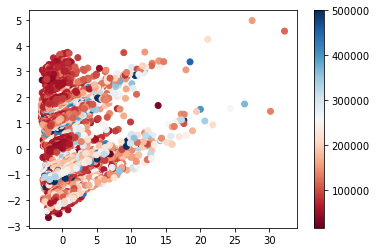

In [19]:
# fit PCA (with 2 PCs)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(Xfull)
# get coordinates in PC space
Xfull_pca = pca.transform(Xfull)
# plot
plt.scatter(Xfull_pca[:,0], Xfull_pca[:,1], c = outcome, cmap = plt.cm.RdBu)
plt.colorbar()
plt.show()

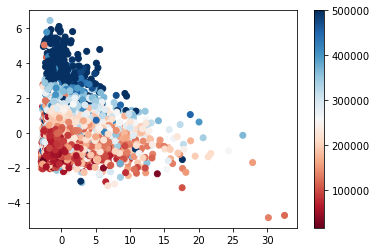

In [22]:
# same but discard longitude & latitude
X_std_bis = X_std[:,2:]
Xfull_bis = np.concatenate([X_std_bis, Xcat], axis = 1)
# fit PCA (with 2 PCs)
pca.fit(Xfull_bis)
# get coordinates in PC space
Xfull_bis_pca = pca.transform(Xfull_bis)
# plot
plt.scatter(Xfull_bis_pca[:,0], Xfull_bis_pca[:,1], c = outcome,cmap = plt.cm.RdBu)
plt.colorbar()
plt.show()